# Bloco 1- Organizando e Reformulando o Dataset

In [1]:
import pandas as pd

# Código para ler o arquivo em xls e retorná-lo em dataframe
dfbr = pd.read_excel("dados brasileirao.xlsx") 

# Nesta linha, foram retiradas todas as colunas que possuiam dados relativos à estáticas após o começo do jogo. Os Dados após o jogo começar não nos ajudam a prever os nossos resultados, pois são muito específicos de cada jogo. Então vamos analisar o principal: número de gols
dfbr = dfbr.drop(["escanteios_man", "escanteios_vis", "publico_max", "faltas_man", "faltas_vis", "chutes_bola_parada_man", "chutes_bola_parada_vis", "defesas_man", "defesas_vis", "impedimentos_man", "impedimentos_vis", "chutes_man", "chutes_vis", "chutes_fora_man", "chutes_fora_vis", "gols_1_tempo_man", "gols_1_tempo_vis"], axis=1)

# Nesta linha, foram tiradas todas as linhas que possuiam dados faltantes, visto que os anos iniciais não tinham todos os dados da tabela preenchidos.
dfbr = dfbr.dropna(axis = 0)

# Nesta linha, são redefinidos os índices para facilitar o trabalho com os dados e foi feito após retirar os dados que não íamos precisar.
dfbr = dfbr.reset_index()

# Nesta parte, foram retiradas as colunas "index" e "Unnamed: 0" para facilitar o trabalho com os dados (Eram colunas com repetição de índices antigos)
dfbr = dfbr.drop(columns=["index", "Unnamed: 0"])

c:\venv\ilumpy\lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


### Dividindo o Dataset para visualizar relações iniciais

In [2]:
# O código a seguir cria um dataframe contendo as faixas de público e as respectivas médias de gols associadas a elas
pub_max = dfbr["publico"].max()
pub_max_norm = pub_max/25
publico_gols = ["publico", "gols_man", "gols_vis"]
dfbr_publico_gols = dfbr[publico_gols]
lista_medias_publico = []
lista_medias_gols_publico = []

for i in range(25):
    n_menor = i*pub_max_norm
    n_maior = (i+1)*pub_max_norm
    dfbr_publico_gols_sep = dfbr_publico_gols.loc[(dfbr_publico_gols["publico"] >= n_menor) & (dfbr_publico_gols["publico"] < n_maior)]
    media_gols_publico_sep = dfbr_publico_gols_sep["gols_man"].mean()
    media_publico = (n_menor + n_maior)/2
    lista_medias_publico.append(media_publico)
    lista_medias_gols_publico.append(media_gols_publico_sep)

dic_publico_gols = {
    "publico_medio": lista_medias_publico,
    "gols_man": lista_medias_gols_publico,
}

dfpg = pd.DataFrame.from_dict(dic_publico_gols)

In [3]:
# O código a seguir cria um dataframe contendo as faixas de valor do clube mandante e as respectivas médias de gols do mandante associadas a elas
valor_max = dfbr["valor_equipe_titular_man"].max()
valor_max_norm = valor_max/10
valor_gols = ["valor_equipe_titular_man", "gols_man", "gols_vis"]
dfbr_valor_gols = dfbr[valor_gols]
lista_medias_valor = []
lista_medias_gols_valor = []

for i in range(10):
    n_menor = i*valor_max_norm
    n_maior = (i+1)*valor_max_norm
    dfbr_valor_gols_sep = dfbr_valor_gols.loc[(dfbr_valor_gols["valor_equipe_titular_man"] >= n_menor) & (dfbr_valor_gols["valor_equipe_titular_man"] < n_maior)]
    media_gols_valor_sep = dfbr_valor_gols_sep["gols_man"].mean()
    media_valor = (n_menor + n_maior)/2
    lista_medias_valor.append(media_valor)
    lista_medias_gols_valor.append(media_gols_valor_sep)
    
dic_valor_gols = {
    "valor_medio": lista_medias_valor,
    "gols_man": lista_medias_gols_valor,
}

dfvg = pd.DataFrame.from_dict(dic_valor_gols)

In [4]:
# O código a seguir cria um dataframe contendo as faixas de valor do clube mandante e as respectivas médias de gols do time visitante associadas a elas
valor_max = dfbr["valor_equipe_titular_man"].max()

valor_max_norm = valor_max/10

valor_gols = ["valor_equipe_titular_man", "gols_man", "gols_vis"]

dfbr_valor_gols = dfbr[valor_gols]

lista_medias_valor = []

lista_medias_gols_valor_vis = []

for i in range(10):
    n_menor = i*valor_max_norm
    n_maior = (i+1)*valor_max_norm
    
    dfbr_valor_gols_sep = dfbr_valor_gols.loc[(dfbr_valor_gols["valor_equipe_titular_man"] >= n_menor) & (dfbr_valor_gols["valor_equipe_titular_man"] < n_maior)]
    media_gols_valor_sep = dfbr_valor_gols_sep["gols_vis"].mean()
    media_valor = (n_menor + n_maior)/2
    lista_medias_valor.append(media_valor)
    lista_medias_gols_valor_vis.append(media_gols_valor_sep)
    
dic_valor_gols_vis = {
    "valor_medio_man": lista_medias_valor,
    "gols_vis": lista_medias_gols_valor_vis,
}

dfvgv = pd.DataFrame.from_dict(dic_valor_gols_vis)

In [5]:
# O código a seguir cria um dataframe contendo as colocações do clube mandante e as respectivas médias de gols do time mandante associadas a elas
colocacao_gols = ["colocacao_man", "gols_man", "gols_vis"]

dfbr_colocacao_gols = dfbr[colocacao_gols]

lista_colocacao = []

lista_medias_gols_colocacao = []

for i in range(20, 0, -1):
    
    dfbr_colocacao_gols_sep = dfbr_colocacao_gols.loc[(dfbr_colocacao_gols["colocacao_man"] == i)]
    media_gols_colocacao_sep = dfbr_colocacao_gols_sep["gols_man"].mean()
    lista_colocacao.append(i)
    lista_medias_gols_colocacao.append(media_gols_colocacao_sep)
    
dic_colocacao_gols = {
    "colocacao_man": lista_colocacao,
    "gols_man": lista_medias_gols_colocacao,
}

dfcg = pd.DataFrame.from_dict(dic_colocacao_gols)

In [6]:
# O código a seguir cria um dataframe contendo as colocações do clube mandante e as respectivas médias de gols do time visitante associadas a elas
colocacao_gols = ["colocacao_man", "gols_man", "gols_vis"]

dfbr_colocacao_gols = dfbr[colocacao_gols]

lista_colocacao = []

lista_medias_gols_colocacao_vis = []

for i in range(20, 0, -1):
    
    dfbr_colocacao_gols_sep = dfbr_colocacao_gols.loc[(dfbr_colocacao_gols["colocacao_man"] == i)]
    media_gols_colocacao_sep_vis = dfbr_colocacao_gols_sep["gols_vis"].mean()
    lista_colocacao.append(i)
    lista_medias_gols_colocacao_vis.append(media_gols_colocacao_sep_vis)
    
dic_colocacao_gols_vis = {
    "colocacao_man": lista_colocacao,
    "gols_vis": lista_medias_gols_colocacao_vis,
}

dfcgv = pd.DataFrame.from_dict(dic_colocacao_gols_vis)

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

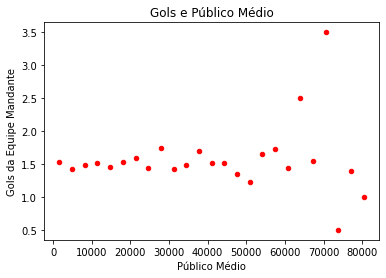

In [8]:
# Nesta linha, são plotados os gráficos de média de gols em cada faixa de público

fig = plt.figure()
ax1 = fig.add_subplot(111)
dfpg.plot('publico_medio','gols_man',legend=True, ax=ax1, kind = 'scatter', color = 'red')
plt.title('Gols e Público Médio')
plt.xlabel('Público Médio')
plt.ylabel('Gols da Equipe Mandante')
#plt.savefig('Gols e Público.png', dpi=100, format='png', facecolor='white')
plt.show()

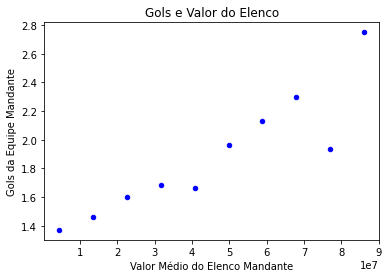

In [9]:
# Nesta linha, são plotados os gráficos de média de gols do mandante em cada faixa de valor do mandante

fig1 = plt.figure()
ax2 = fig1.add_subplot(111)
dfvg.plot('valor_medio','gols_man',legend=True, ax=ax2, kind = 'scatter', color = 'blue')
plt.title('Gols e Valor do Elenco')
plt.xlabel('Valor Médio do Elenco Mandante')
plt.ylabel('Gols da Equipe Mandante')
#plt.savefig('Gols e Valor do Elenco.png', dpi=100, format='png', facecolor='white')
plt.show()

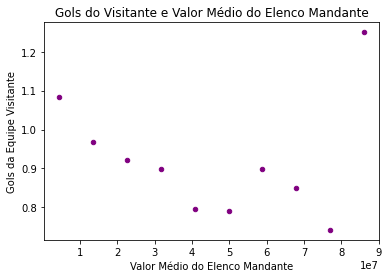

In [10]:
# Nesta linha, são plotados os gráficos de média de gols do visitante em cada faixa de valor do mandante

fig2 = plt.figure()
ax3 = fig2.add_subplot(111)
dfvgv.plot('valor_medio_man','gols_vis',legend=True, ax=ax3, kind = 'scatter', color = 'purple')
plt.title('Gols do Visitante e Valor Médio do Elenco Mandante')
plt.xlabel('Valor Médio do Elenco Mandante')
plt.ylabel('Gols da Equipe Visitante')
#plt.savefig('Gols do Visitante e Valor do Elenco Mandante.png', dpi=100, format='png', facecolor='white')
plt.show()

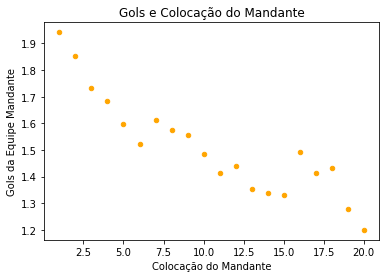

In [11]:
# Nesta linha, são plotados os gráficos de média de gols do mandante em cada colocação do mandante

fig3 = plt.figure()
ax4 = fig3.add_subplot(111)
dfcg.plot('colocacao_man','gols_man',legend=True, ax=ax4, kind = 'scatter', color = 'orange')
plt.title('Gols e Colocação do Mandante')
plt.xlabel('Colocação do Mandante')
plt.ylabel('Gols da Equipe Mandante')
#plt.savefig('Gols e Colocação do Mandante.png', dpi=100, format='png', facecolor='white')
plt.show()

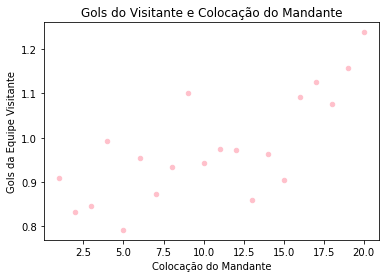

In [12]:
# Nesta linha, são plotados os gráficos de média de gols do visitante em cada colocação do mandante

fig4 = plt.figure()
ax5 = fig4.add_subplot(111)
dfcgv.plot('colocacao_man','gols_vis',legend=True, ax=ax5, kind = 'scatter', color = 'pink')
plt.title('Gols do Visitante e Colocação do Mandante')
plt.xlabel('Colocação do Mandante')
plt.ylabel('Gols da Equipe Visitante')
#plt.savefig('Gols do Visitante e Colocação do Mandante.png', dpi=100, format='png', facecolor='white')
plt.show()

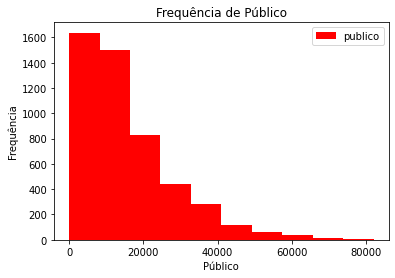

In [13]:
# Nesta linha, foi plotado um histograma da quantidade de público nos jogos

fig5 = plt.figure()
ax6 = fig5.add_subplot(111)
dfbr['publico'].plot(legend=True, ax=ax6, kind = 'hist', color = 'red')
plt.title('Frequência de Público')
plt.xlabel('Público')
plt.ylabel('Frequência')
#plt.savefig('Frequência de Público.png', dpi=100, format='png', facecolor='white')
plt.show()

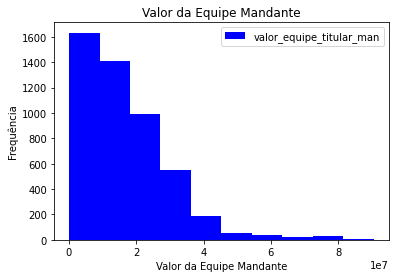

In [14]:
# Nesta linha, foi plotado um histograma do valor da equipe titular do mandante

fig6 = plt.figure()
ax7 = fig6.add_subplot(111)
dfbr["valor_equipe_titular_man"].plot(legend=True, ax=ax7, kind = 'hist', color = 'blue')
plt.title('Valor da Equipe Mandante')
plt.xlabel('Valor da Equipe Mandante')
plt.ylabel('Frequência')
#plt.savefig('Frequência de Valor da Equipe Mandante.png', dpi=100, format='png', facecolor='white')
plt.show()

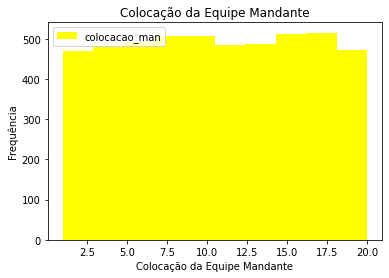

In [15]:
# Nesta linha, foi plotado um histograma da colocação da equipe mandante.

fig7 = plt.figure()
ax8 = fig7.add_subplot(111)
dfbr["colocacao_man"].plot(legend=True, ax=ax8, kind = 'hist', color = 'yellow')
plt.title('Colocação da Equipe Mandante')
plt.xlabel('Colocação da Equipe Mandante')
plt.ylabel('Frequência')
#plt.savefig('Frequência da Colocação.png', dpi=100, format='png', facecolor='white')
plt.show()

## Comentário a respeito do Bloco 1

Neste bloco, nós iniciamos, em um primeiro momento, a escolha de um tema e a busca por APIs que abordassem o tema escolhido. Então, nós escolhemos o tema Futebol com o intuito de estudar os eventos ocorridos em um jogo de futebol para realizar previsões sobre futuros jogos. Essa área está, atualmente, em evidência, especialmente pelo surgimento de sites de apostas esportivas, os quais se consolidaram como forma de se divertir, testar o seu conhecimento sobre o esporte e, é claro, ganhar dinheiro! :)

Para isso, nós utilizamos dados em relação ao Brasileirão: de 2003 a 2020, obtidos a partir do Transfermarkt. Os dados compreendiam alguns eventos possíveis em um jogo de futebol, como a quantidade de gols, escanteios, impedimentos, a colocação dos times, o valor de cada time, entre outros. Portanto, foi necessário estabelecer um target entre esses dados para realizar as previsões. O target escolhido foi o resultado do jogo, ou seja os gols do time mandante e os gols do time visitante. Então, foi estabelecido que seriam utilizadas apenas features possíveis de se obter anteriormente à partida, como a colocação dos times e o público do estádio, por exemplo.

A partir disso, foi realizada um tratamento inicial nos dados obtidos para, por exemplo, retirar algumas features que ocorriam durante o jogo, como o número de impedimentos, e alguns jogos que não possuíam todos os dados. Após o tratamento, nós plotamos alguns gráficos envolvendo as nossas features e o nosso target para entender qual era a relação entre eles e basear a nossa abordagem das práticas posteriores.

# Bloco 2- Métodos de Modelagem dos Dados

### Divisão do dataset

In [16]:
# Divisão dos dados do dataset em treino e teste

from sklearn.model_selection import train_test_split # Divisão feita usando a função train_test_split

TAMANHO_TESTE = 0.1 # Porcentagem destinada do dataset ao grupo de teste
SEMENTE_ALEATORIA = 122106 # Definição de uma seed para evitar mudança desses grupos

# Escolha dos índices e seleção feita pela função
indices = dfbr.index
indices_treino, indices_teste = train_test_split(
    indices, test_size=TAMANHO_TESTE, random_state=SEMENTE_ALEATORIA
)

# Atribuição dos índices escolhidos aos dados
dfbr_treino = dfbr.loc[indices_treino].sort_index()
dfbr_teste = dfbr.loc[indices_teste].sort_index()

# Aqui são escolhidos os atributos do dataset e é definido o target 

FEATURES = ["valor_equipe_titular_man","publico","idade_media_titular_man","colocacao_man","valor_equipe_titular_vis","idade_media_titular_vis","gols_vis","colocacao_vis","ano_campeonato"]
TARGET = ["gols_man"]

# Divide os dados para se adequarem aos modelos

X_treino = dfbr_treino.reindex(FEATURES, axis=1).values
y_treino = dfbr_treino.reindex(TARGET, axis=1).values
X_teste = dfbr_teste.reindex(FEATURES, axis=1).values
y_teste = dfbr_teste.reindex(TARGET, axis=1).values

Nessa etapa foi preciso fazer a divisão do dataset em treino e teste, uma vez que, nesse bloco o foco era fazer a modelagem dos nossos dados. E com isso, dividimos os atributos que seriam colocados como features e como target (gols feito pela equipe mandante)

### Modelo Baseline

In [17]:
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error

# Cria um modelo baseline para termos uma base de comparação com outros modelos
modelo_baseline = DummyRegressor()

# Treina o modelo de acordo com os dados escolhidos antes
modelo_baseline.fit(X_treino, y_treino)

# Realiza uma previsão usando o modelo treinado
previsao_baseline = modelo_baseline.predict(X_teste)
print(f"O time mandante faria {previsao_baseline[0]} gols")

# Verificando o erro do modelo usando o RMSE (root mean squared error)
y_verdadeiro = y_teste
y_previsao_baseline = modelo_baseline.predict(X_teste)

RMSE = mean_squared_error(y_verdadeiro, y_previsao_baseline, squared=False)

print(f"O RMSE do modelo baseline foi de {RMSE} gols.")

O time mandante faria 1.5049683830171634 gols
O RMSE do modelo baseline foi de 1.1665724061927247 gols.


Nessa parte, foi preciso fazer o baseline para termos um parâmetro de comparação com outros modelos e também foi calculado o erro (RMSE) referente a tal modelagem.

### Regressão Linear

In [18]:
from sklearn.linear_model import LinearRegression

# Cria um modelo linear
modelo_linear = LinearRegression()

# Treina esse modelo 
modelo_linear.fit(X_treino, y_treino)

# Realiza uma previsão usando o modelo treinado
previsao_linear = modelo_linear.predict(X_teste)
print(previsao_linear[0]) # Foi escolhida apenas uma linha para melhorar a visualização

# Verificando o erro do modelo usando o RMSE (root mean squared error)

y_verdadeiro = y_teste
y_previsao_linear = modelo_linear.predict(X_teste)

RMSE = mean_squared_error(y_verdadeiro, y_previsao_linear, squared=False)

print(f"O RMSE do modelo linear foi de {RMSE} gols.")

[1.54035654]
O RMSE do modelo linear foi de 1.1010162933686618 gols.


A primeira abordagem foi feita usado regressão linear e com ela observamos um erro menor em comparação ao baseline.

### Regressão Linear Normalizada

In [19]:
from sklearn.preprocessing import MinMaxScaler

# Usa um função normalizadora sobre os dados

normalizador_x = MinMaxScaler()
normalizador_y = MinMaxScaler()

normalizador_x.fit(X_treino)
normalizador_y.fit(y_treino)

# Cria um modelo linear
modelo_linear_norm = LinearRegression()

# Treina esse modelo
modelo_linear_norm.fit(
    normalizador_x.transform(X_treino),
    normalizador_y.transform(y_treino),
)

# Realiza uma previsão usando o modelo linear normalizado treinado
previsao = modelo_linear_norm.predict(normalizador_x.transform(X_treino))
previsao = normalizador_y.inverse_transform(previsao)
print(previsao)

# Verificando o erro do modelo usando o RMSE (root mean squared error)

y_verdadeiro = y_teste
y_previsao = modelo_linear_norm.predict(normalizador_x.transform(X_teste))
y_previsao = normalizador_y.inverse_transform(y_previsao)

RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)

print(f"O RMSE do modelo linear foi de {RMSE} gols.")


[[1.82152712]
 [1.71269558]
 [1.80884794]
 ...
 [1.15358695]
 [1.54537951]
 [1.55884239]]
O RMSE do modelo linear foi de 1.1010162933686638 gols.


A normalização, algo muito importante a ser feito em machine learning, visto que, ajuda a ter um menor erro pelo controle da dispersão dos dados, no nosso dataset não mostrou uma diferença considerável. Por exemplo, podemos citar os valores do time mandante na mesma feature que estão sempre em uma ordem de grandeza próxima ou igual.

### k-NN / k vizinhos

In [20]:
from sklearn.neighbors import KNeighborsRegressor

# cria o modelo
modelo_knn = KNeighborsRegressor()

# treina o modelo
modelo_knn.fit(X_treino, y_treino)

# realiza uma previsão usando o modelo treinado
previsao = modelo_knn.predict(X_teste)
print(previsao[0])

[1.2]


In [21]:
from sklearn.metrics import mean_squared_error

y_verdadeiro = y_teste
y_previsao = modelo_knn.predict(X_teste)

RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)

print(f"O RMSE do modelo k-NN foi de {RMSE} gols.")

O RMSE do modelo k-NN foi de 1.2451610191010816 gols.


In [22]:
NUM_VIZINHOS = [1, 10, 100]

for n in NUM_VIZINHOS:
    modelo_knn = KNeighborsRegressor(n_neighbors=n)

    modelo_knn.fit(X_treino, y_treino)

    y_verdadeiro = y_teste
    y_previsao = modelo_knn.predict(X_teste)
    RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)
    print(f"O RMSE do modelo k-NN usando k={n} foi de {RMSE} gols.")

O RMSE do modelo k-NN usando k=1 foi de 1.5821006909640374 gols.
O RMSE do modelo k-NN usando k=10 foi de 1.1816806541350324 gols.
O RMSE do modelo k-NN usando k=100 foi de 1.1231268832786456 gols.


No K Vizinhos tivemos um pior erro comparado ao da regressão linear, mas que diminui quando aumentamos o número de vizinhos.

### Árvore de Decisão

In [23]:
# Árvore de Decisão

from sklearn.tree import DecisionTreeRegressor

# cria o modelo
modelo_dt = DecisionTreeRegressor(random_state=SEMENTE_ALEATORIA)

# treina o modelo
modelo_dt.fit(X_treino, y_treino)

# realiza uma previsão usando o modelo treinado
previsao = modelo_dt.predict(X_teste)
print(previsao[1]) # Escolhido apenas um elemento para facilitar a visualização

y_verdadeiro = y_teste
y_previsao = modelo_dt.predict(X_teste)

RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)

print(f"O RMSE do modelo árvore de decisão foi de {RMSE} gols.")

1.0
O RMSE do modelo árvore de decisão foi de 1.6809395614746618 gols.


In [24]:
# Árvore de decisões com hiperparâmetros

from itertools import product

NUM_FOLHAS = [None, 6, 36]
NUM_PROFUNDIDADE = [None, 1, 2, 3, 10]

for n_folhas, n_profundidade in product(NUM_FOLHAS, NUM_PROFUNDIDADE):
    modelo_dt = DecisionTreeRegressor(
        max_leaf_nodes=n_folhas,
        max_depth=n_profundidade,
        random_state=SEMENTE_ALEATORIA,
    )

    modelo_dt.fit(X_treino, y_treino)

    y_verdadeiro = y_teste
    y_previsao = modelo_dt.predict(X_teste)
    RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)

    print(
        f"O RMSE do modelo AD usando max_leaf_nodes={n_folhas} "
        f"e max_depth={n_profundidade} foi de {RMSE:.3f} gols."
    )

O RMSE do modelo AD usando max_leaf_nodes=None e max_depth=None foi de 1.681 gols.
O RMSE do modelo AD usando max_leaf_nodes=None e max_depth=1 foi de 1.140 gols.
O RMSE do modelo AD usando max_leaf_nodes=None e max_depth=2 foi de 1.125 gols.
O RMSE do modelo AD usando max_leaf_nodes=None e max_depth=3 foi de 1.130 gols.
O RMSE do modelo AD usando max_leaf_nodes=None e max_depth=10 foi de 1.333 gols.
O RMSE do modelo AD usando max_leaf_nodes=6 e max_depth=None foi de 1.121 gols.
O RMSE do modelo AD usando max_leaf_nodes=6 e max_depth=1 foi de 1.140 gols.
O RMSE do modelo AD usando max_leaf_nodes=6 e max_depth=2 foi de 1.125 gols.
O RMSE do modelo AD usando max_leaf_nodes=6 e max_depth=3 foi de 1.121 gols.
O RMSE do modelo AD usando max_leaf_nodes=6 e max_depth=10 foi de 1.121 gols.
O RMSE do modelo AD usando max_leaf_nodes=36 e max_depth=None foi de 1.166 gols.
O RMSE do modelo AD usando max_leaf_nodes=36 e max_depth=1 foi de 1.140 gols.
O RMSE do modelo AD usando max_leaf_nodes=36 e m

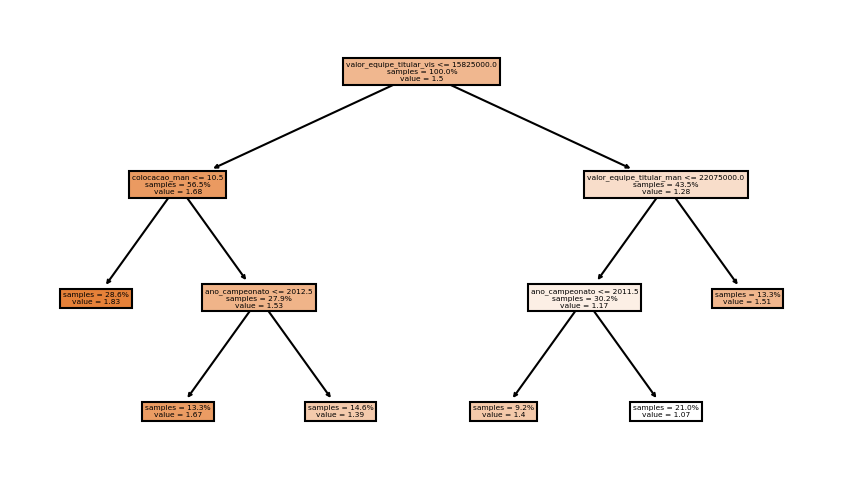

In [25]:
# Visualização da Árvore de Decisão

from matplotlib import pyplot as plt
from sklearn import tree

# Cria e treina o modelo
modelo_dt = DecisionTreeRegressor(
    max_leaf_nodes=6,
    random_state=SEMENTE_ALEATORIA,
)
modelo_dt.fit(X_treino, y_treino)

# Cria os objetos de figura e eixo
fig, axe = plt.subplots(
    ncols=1,
    nrows=1,
    figsize=(7, 4),
    dpi=150,
)

# Plota o grafo da árvore de decisão
tree.plot_tree(
    modelo_dt,
    feature_names=FEATURES,
    ax=axe,
    impurity=False,
    filled=True,
    proportion=True,
    precision=2,
)

# Salva a imagem
#plt.savefig('ÁrvoreDoFut.png',facecolor='white')

# Mostra o plot para o usuário
plt.show()

Nessa modelagem precisamos controlar a profunidade e o número de folhas que queríamos que estivesse na árvore de decisão e isso foi crucial para o controle de erro dos nossos dados. Assim, o melhor parâmetro que encontramos foi com max_leaf_nodes=6 e max_depth=3, max_depth=10 ou max_depth= None. Assim, percebemos que a profundidade foi menos relevante que o número de folhas. 

### Floresta Aleatória

In [26]:
# Floresta Aleatória

from sklearn.ensemble import RandomForestRegressor

# alterando o formato do target
print(y_treino.shape, y_teste.shape)
y_treino = y_treino.ravel()
y_teste = y_teste.ravel()
print(y_treino.shape, y_teste.shape)

# cria o modelo
modelo_rf = RandomForestRegressor(random_state=SEMENTE_ALEATORIA)

# treina o modelo
modelo_rf.fit(X_treino, y_treino)

# realiza uma previsão usando o modelo treinado
previsao = modelo_rf.predict(X_teste)
print()
print(previsao[0]) # Escolhido um elemento para facilitar a visualização

y_verdadeiro = y_teste
y_previsao = modelo_rf.predict(X_teste)

RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)

print(f"O RMSE do modelo floresta de decisão foi de {RMSE} gols.")

(4428, 1) (493, 1)
(4428,) (493,)

1.83
O RMSE do modelo floresta de decisão foi de 1.1285866872998755 gols.


In [27]:
# Floresta Aleatória com Hiperparâmetros

from itertools import product

NUM_ARVORES = [10, 100, 300]
NUM_FOLHAS = [None, 6]
NUM_PROFUNDIDADE = [None, 3]

for n_folhas, n_profundidade, n_arvores in product(
    NUM_FOLHAS, NUM_PROFUNDIDADE, NUM_ARVORES
):
    modelo_rf = RandomForestRegressor(
        n_estimators=n_arvores,
        max_leaf_nodes=n_folhas,
        max_depth=n_profundidade,
        random_state=SEMENTE_ALEATORIA,
        n_jobs=4,
    )

    modelo_rf.fit(X_treino, y_treino)

    y_verdadeiro = y_teste
    y_previsao = modelo_rf.predict(X_teste)
    RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)

    print(
        f"O RMSE do modelo RF usando "
        f"n_estimators={n_arvores} max_leaf_nodes={n_folhas} "
        f"e max_depth={n_profundidade} foi de {RMSE:.3f} gols."
    )

O RMSE do modelo RF usando n_estimators=10 max_leaf_nodes=None e max_depth=None foi de 1.171 gols.
O RMSE do modelo RF usando n_estimators=100 max_leaf_nodes=None e max_depth=None foi de 1.129 gols.
O RMSE do modelo RF usando n_estimators=300 max_leaf_nodes=None e max_depth=None foi de 1.120 gols.
O RMSE do modelo RF usando n_estimators=10 max_leaf_nodes=None e max_depth=3 foi de 1.113 gols.
O RMSE do modelo RF usando n_estimators=100 max_leaf_nodes=None e max_depth=3 foi de 1.115 gols.
O RMSE do modelo RF usando n_estimators=300 max_leaf_nodes=None e max_depth=3 foi de 1.114 gols.
O RMSE do modelo RF usando n_estimators=10 max_leaf_nodes=6 e max_depth=None foi de 1.115 gols.
O RMSE do modelo RF usando n_estimators=100 max_leaf_nodes=6 e max_depth=None foi de 1.117 gols.
O RMSE do modelo RF usando n_estimators=300 max_leaf_nodes=6 e max_depth=None foi de 1.117 gols.
O RMSE do modelo RF usando n_estimators=10 max_leaf_nodes=6 e max_depth=3 foi de 1.114 gols.
O RMSE do modelo RF usando n

Na floresta o RMSE se comportou de forma melhor do que na árvore de decisão, porém não teve nenhuma diferença significativa.

### Importância das Features

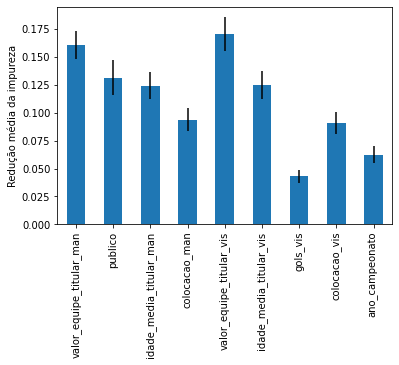

In [28]:
# Importância das Features com a Impureza

N_ARVORES = 50
N_JOBS = 4

modelo_rf = RandomForestRegressor(
    n_estimators=N_ARVORES,
    random_state=SEMENTE_ALEATORIA,
    n_jobs=N_JOBS,
)

modelo_rf.fit(X_treino, y_treino)

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

importancia = modelo_rf.feature_importances_
desvio_padrao = np.std(
    [arvore.feature_importances_ for arvore in modelo_rf.estimators_], axis=0
)

serie_importancia = pd.Series(importancia, index=FEATURES)

fig, axe = plt.subplots()
serie_importancia.plot.bar(yerr=desvio_padrao, ax=axe)
axe.set_ylabel("Redução média da impureza")
plt.show()

In [29]:
# Importância das Features com a Permutação e grupo de treino

from sklearn.inspection import permutation_importance

N_REPETICOES = 10


def R2_1param(modelo, x, y):
    """Computa o coef. de determinação quando hip. alt. não tem coef. linear."""
    y_pred = modelo.predict(x).ravel()
    y_true = (np.array(y)).ravel()
    return 1 - sum((y_true - y_pred) ** 2) / sum(y_true**2)


X_local = X_treino
y_local = y_treino

R2 = R2_1param(modelo_rf, X_local, y_local)
print(f"O R^2 da previsão é de {R2}")

# Aqui que calculamos a importância das features
r = permutation_importance(
    modelo_rf,
    X_local,
    y_local,
    n_repeats=N_REPETICOES,
    random_state=SEMENTE_ALEATORIA,
    scoring=R2_1param,
)

print()

# Aqui nós exibimos os resultados obtidos
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{FEATURES[i]:<25}"
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")

O R^2 da previsão é de 0.9438965651171258

valor_equipe_titular_vis 0.231 +/- 0.004
valor_equipe_titular_man 0.180 +/- 0.002
colocacao_man            0.139 +/- 0.003
ano_campeonato           0.102 +/- 0.002
publico                  0.095 +/- 0.002
colocacao_vis            0.088 +/- 0.002
idade_media_titular_man  0.088 +/- 0.001
idade_media_titular_vis  0.086 +/- 0.001
gols_vis                 0.050 +/- 0.001


In [30]:
# Importância das Features com a Permutação e grupo de teste

X_local = X_teste
y_local = y_teste

R2 = R2_1param(modelo_rf, X_local, y_local)
print(f"O R^2 da previsão é de {R2}")

# Aqui que calculamos a importância das features
r = permutation_importance(
    modelo_rf,
    X_local,
    y_local,
    n_repeats=N_REPETICOES,
    random_state=SEMENTE_ALEATORIA,
    scoring=R2_1param,
)

print()

# Aqui nós exibimos os resultados obtidos para as features mais importantes
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{FEATURES[i]:<25}"
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")

O R^2 da previsão é de 0.6620541401273883

valor_equipe_titular_vis 0.022 +/- 0.007
publico                  0.007 +/- 0.003
gols_vis                 0.005 +/- 0.002


Nessa etapa, verificamos a importância que cada feature tinha no nossos resultados e plotamos um gráfico para fazer essa análise com o fim de remover alguma que não fosse relevante. Depois de analisá-los, decidimos tirar o ano do campeonato para métodos futuros de modelagem.

## Usando Classificação

### Reorganizando os dados

In [31]:
# Cria uma lista de condições
Condições = [
    (dfbr['gols_man'] > dfbr['gols_vis']),
    (dfbr['gols_man'] == dfbr['gols_vis']),
    (dfbr['gols_man'] < dfbr['gols_vis'])
    ]

# Cria uma lista com os possíveis resultados
Valores = ['Vitória', 'Empate', 'Derrota']

# Cria uma nova coluna com o resultado da partida para o mandante
dfbr['resultado_man'] = np.select(Condições, Valores)

dfbr.head()

,ano_campeonato,data,horario,rodada,estadio,arbitro,publico,time_man,time_vis,tecnico_man,tecnico_vis,colocacao_man,colocacao_vis,valor_equipe_titular_man,valor_equipe_titular_vis,idade_media_titular_man,idade_media_titular_vis,gols_man,gols_vis,resultado_man
0,2007,2007-05-03,12:00,1,Estádio Governador Magalhães Pinto,Elmo Alves Resende Cunha,5116.0,Atlético-MG,Náutico,Tico dos Santos,Paulo César Gusmão,7.0,13.0,1650000.0,500000.0,24.6,26.4,2.0,1.0,Vitória
1,2007,2007-05-03,12:00,1,Estádio Jornalista Mário Filho,Leonardo Gaciba da Silva,7801.0,Flamengo,Palmeiras,Ney Franco,Caio Júnior,16.0,4.0,550000.0,3750000.0,26.2,26.7,2.0,4.0,Derrota
2,2007,2007-05-03,12:00,1,Estádio Jornalista Mário Filho,Wallace Nascimento Valente,12132.0,Fluminense,Cruzeiro,Renato Gaúcho,Dorival Júnior,11.0,10.0,7200000.0,5750000.0,24.4,24.1,2.0,2.0,Empate
3,2007,2007-05-03,12:00,1,Estádio Durival Britto e Silva,Elvecio Zequetto,3568.0,Paraná,Grêmio,Zetti,Mano Menezes,3.0,20.0,1000000.0,1500000.0,26.5,24.0,3.0,0.0,Vitória
4,2007,2007-05-03,12:00,1,Estádio Adelmar da Costa Carvalho,Antonio Hora Filho,23273.0,Sport Recife,Santos FC,Giba,Vanderlei Luxemburgo,2.0,19.0,2750000.0,5350000.0,26.2,24.4,4.0,1.0,Vitória


In [32]:
# Nova divisão dos dados do dataset em treino e teste

from sklearn.model_selection import train_test_split # Divisão feita usando a função train_test_split

TAMANHO_TESTE = 0.3 # Porcentagem destinada do dataset ao grupo de teste
SEMENTE_ALEATORIA = 122106 # Definição de uma seed para evitar mudança desses grupos

# Escolha dos índices e seleção feita pela função
indices = dfbr.index
indices_treino, indices_teste = train_test_split(
    indices, test_size=TAMANHO_TESTE, random_state=SEMENTE_ALEATORIA
)

# Atribuição dos índices escolhidos aos dados
dfbr_treino = dfbr.loc[indices_treino].sort_index()
dfbr_teste = dfbr.loc[indices_teste].sort_index()

# Aqui são escolhidos os atributos do dataset e é definido o target 

FEATURES = ["valor_equipe_titular_man","publico","idade_media_titular_man","colocacao_man","valor_equipe_titular_vis","idade_media_titular_vis","colocacao_vis"]
TARGET = ["resultado_man"]

# Divide os dados para se adequarem aos modelos

X_treino = dfbr_treino.reindex(FEATURES, axis=1).values
y_treino = dfbr_treino.reindex(TARGET, axis=1).values
X_teste = dfbr_teste.reindex(FEATURES, axis=1).values
y_teste = dfbr_teste.reindex(TARGET, axis=1).values

Nessa etapa reorganizamos os dados e decidimos trocar o target para uma melhor análise, uma vez que, trabalhar com o número de gols não era algo tão interresante na previsão por causa do RMSE e então decidimos tentar uma nova abordagem.

### k-NN

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# cria o modelo
modelo_knn = KNeighborsClassifier()

# treina o modelo
modelo_knn.fit(X_treino, y_treino)

# realiza uma previsão usando o modelo treinado
previsao = modelo_knn.predict(X_teste)
print(previsao[0])

# Precisão do método
print("Accuracy:",metrics.accuracy_score(y_teste, previsao))

Empate
Accuracy: 0.3886255924170616


c:\venv\ilumpy\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [34]:
# Matriz com a quantidade de resultados previstos

resultados_mandante, quantidade = np.unique(previsao, return_counts=True)
Matriz_Resultados_Previstos_kNN = np.column_stack((resultados_mandante, quantidade)) 
Matriz_Resultados_Previstos_kNN

array([['Derrota', 449],
       ['Empate', 348],
       ['Vitória', 680]], dtype=object)

In [35]:
# Matriz de Confusão

from sklearn.metrics import confusion_matrix
Matriz_Confusao_kNN = confusion_matrix(y_teste, previsao)
Matriz_Confusao_kNN

array([[102, 105, 112],
       [136,  87, 183],
       [211, 156, 385]], dtype=int64)

In [36]:
# Report com diferentes métricas

from sklearn.metrics import classification_report
classification_report(y_teste, previsao)

'              precision    recall  f1-score   support\n\n     Derrota       0.23      0.32      0.27       319\n      Empate       0.25      0.21      0.23       406\n     Vitória       0.57      0.51      0.54       752\n\n    accuracy                           0.39      1477\n   macro avg       0.35      0.35      0.34      1477\nweighted avg       0.41      0.39      0.39      1477\n'

Com uma nova abordagem focada em resultados, ou seja, Vitória, Empate e Derrota do time mandante, conseguimos ter uma melhor dinâmica dos dados mas uma pior acurácia usando o K Vizinhos. Nessa modelagem também, tivemos uma precisão de 57% para vitórias e acurácia de 38% para o modelo.

### Árvore de Decisão

In [37]:
from sklearn.tree import DecisionTreeClassifier

# cria o modelo
modelo_dt = DecisionTreeClassifier(random_state=SEMENTE_ALEATORIA)

# treina o modelo
modelo_dt.fit(X_treino, y_treino)

# realiza uma previsão usando o modelo treinado
previsao = modelo_dt.predict(X_teste)
print(previsao[0])

# Precisão do método
print("Accuracy:",metrics.accuracy_score(y_teste, previsao))

Vitória
Accuracy: 0.4001354096140826


In [38]:
# Matriz com a quantidade de resultados previstos

resultados_mandante, quantidade = np.unique(previsao, return_counts=True)
Matriz_Resultados_Previstos_AD = np.column_stack((resultados_mandante, quantidade)) 
Matriz_Resultados_Previstos_AD

array([['Derrota', 331],
       ['Empate', 436],
       ['Vitória', 710]], dtype=object)

In [39]:
# Matriz de Confusão

from sklearn.metrics import confusion_matrix
Matriz_Confusao_AD = confusion_matrix(y_teste, previsao)
Matriz_Confusao_AD

array([[ 95,  90, 134],
       [ 86, 120, 200],
       [150, 226, 376]], dtype=int64)

In [40]:
# Report com diferentes métricas

from sklearn.metrics import classification_report
classification_report(y_teste, previsao)

'              precision    recall  f1-score   support\n\n     Derrota       0.29      0.30      0.29       319\n      Empate       0.28      0.30      0.29       406\n     Vitória       0.53      0.50      0.51       752\n\n    accuracy                           0.40      1477\n   macro avg       0.36      0.36      0.36      1477\nweighted avg       0.41      0.40      0.40      1477\n'

Aqui tivemos uma acurácia de 40% e uma precisão no acerto de vitórias 53%.

### Floresta Aleatória

In [41]:
# Floresta Aleatória

from sklearn.ensemble import RandomForestClassifier

# cria o modelo
modelo_rf = RandomForestClassifier(random_state=SEMENTE_ALEATORIA)

# treina o modelo
modelo_rf.fit(X_treino, y_treino.ravel())

# realiza uma previsão usando o modelo treinado
previsao = modelo_rf.predict(X_teste)
print(previsao[0])

# Precisão do método
print("Accuracy:",metrics.accuracy_score(y_teste, previsao))

Vitória
Accuracy: 0.4928909952606635


In [42]:
# Matriz com a quantidade de resultados previstos

resultados_mandante, quantidade = np.unique(previsao, return_counts=True)
Matriz_Resultados_Previstos_FA = np.column_stack((resultados_mandante, quantidade)) 
Matriz_Resultados_Previstos_FA

array([['Derrota', 213],
       ['Empate', 204],
       ['Vitória', 1060]], dtype=object)

In [43]:
# Matriz de Confusão

from sklearn.metrics import confusion_matrix
Matriz_Confusao_FA = confusion_matrix(y_teste, previsao)
Matriz_Confusao_FA

array([[ 80,  62, 177],
       [ 55,  58, 293],
       [ 78,  84, 590]], dtype=int64)

In [44]:
# Report com diferentes métricas

from sklearn.metrics import classification_report
classification_report(y_teste, previsao)

'              precision    recall  f1-score   support\n\n     Derrota       0.38      0.25      0.30       319\n      Empate       0.28      0.14      0.19       406\n     Vitória       0.56      0.78      0.65       752\n\n    accuracy                           0.49      1477\n   macro avg       0.41      0.39      0.38      1477\nweighted avg       0.44      0.49      0.45      1477\n'

In [45]:
# Floresta Aleatória com hiperparâmetros

from itertools import product

NUM_ARVORES = [50]
NUM_FOLHAS = [3, 6, 9]
NUM_PROFUNDIDADE = [2, 3, 6]

for n_folhas, n_profundidade, n_arvores in product(
    NUM_FOLHAS, NUM_PROFUNDIDADE, NUM_ARVORES
):
    modelo_rf = RandomForestClassifier(
        n_estimators=n_arvores,
        max_leaf_nodes=n_folhas,
        max_depth=n_profundidade,
        random_state=SEMENTE_ALEATORIA,
        n_jobs=4,
    )

    modelo_rf.fit(X_treino, y_treino.ravel())

    y_verdadeiro = y_teste
    y_previsao = modelo_rf.predict(X_teste)
    
    acuracia = metrics.accuracy_score(y_teste, y_previsao)
    #print("Accuracy:",acuracia)
    
    print(
        f"A acurácia do modelo RF usando "
        f"n_estimators={n_arvores} max_leaf_nodes={n_folhas} "
        f"e max_depth={n_profundidade} foi de {acuracia:.4f}."
    )

A acurácia do modelo RF usando n_estimators=50 max_leaf_nodes=3 e max_depth=2 foi de 0.5091.
A acurácia do modelo RF usando n_estimators=50 max_leaf_nodes=3 e max_depth=3 foi de 0.5091.
A acurácia do modelo RF usando n_estimators=50 max_leaf_nodes=3 e max_depth=6 foi de 0.5091.
A acurácia do modelo RF usando n_estimators=50 max_leaf_nodes=6 e max_depth=2 foi de 0.5091.
A acurácia do modelo RF usando n_estimators=50 max_leaf_nodes=6 e max_depth=3 foi de 0.5105.
A acurácia do modelo RF usando n_estimators=50 max_leaf_nodes=6 e max_depth=6 foi de 0.5091.
A acurácia do modelo RF usando n_estimators=50 max_leaf_nodes=9 e max_depth=2 foi de 0.5091.
A acurácia do modelo RF usando n_estimators=50 max_leaf_nodes=9 e max_depth=3 foi de 0.5125.
A acurácia do modelo RF usando n_estimators=50 max_leaf_nodes=9 e max_depth=6 foi de 0.5146.


In [46]:
# Matriz com a quantidade de resultados previstos

resultados_mandante, quantidade = np.unique(y_previsao, return_counts=True)
Matriz_Resultados_Previstos_FAH = np.column_stack((resultados_mandante, quantidade)) 
Matriz_Resultados_Previstos_FAH

array([['Derrota', 69],
       ['Empate', 1],
       ['Vitória', 1407]], dtype=object)

In [47]:
# Matriz de Confusão

from sklearn.metrics import confusion_matrix
Matriz_Confusao_FAH = confusion_matrix(y_teste, y_previsao)
Matriz_Confusao_FAH

array([[ 30,   1, 288],
       [ 17,   0, 389],
       [ 22,   0, 730]], dtype=int64)

In [48]:
# Report com diferentes métricas

from sklearn.metrics import classification_report
classification_report(y_teste, y_previsao)

'              precision    recall  f1-score   support\n\n     Derrota       0.43      0.09      0.15       319\n      Empate       0.00      0.00      0.00       406\n     Vitória       0.52      0.97      0.68       752\n\n    accuracy                           0.51      1477\n   macro avg       0.32      0.35      0.28      1477\nweighted avg       0.36      0.51      0.38      1477\n'

Na floresta aleatória tivemos uma boa acurácia de 49,3% e uma precisão para vitória de 56%. Entretanto, ao realizar a visualização do resultado vimos que tivemos um número alto de vitórias, muito mais que empates e derrotas, mais ainda sim com uma boa dispersão dos dados.

Quando usamos hiperparâmetros de número de árvores, folhas e profundidades eles forneceram uma acurácia de 51,4% e uma precisão para vitória de 52%. Todavia, vimos que o modelo previu um número discrepante de vitórias, classificando a quase totalidade dos jogos como vitória do mandante. Acreditamos que isso aconteceu por causa de uma hiperespecialização das folhas que considerou pequenas diferenças de valores e deu vitória para o maior, mesmo que com uma diferença pouco relevante.

# Bloco 3 - Aprendizado não-supervisionado

## ML Não Supervionado e PCA

### Reorganinzando os Dados

In [49]:
# Cria uma lista de condições
Condições = [
    (dfbr['resultado_man'] == 'Vitória'),
    (dfbr['resultado_man'] == 'Empate'),
    (dfbr['resultado_man'] == 'Derrota')
    ]

# Cria uma lista com os possíveis resultados
Valores = [1, 0.5, 0]

# Cria uma nova coluna com o resultado da partida para o mandante
dfbr['resultado_man'] = np.select(Condições, Valores)

# Normalização dos dados

FEATURES = ["valor_equipe_titular_man","publico","idade_media_titular_man","colocacao_man","valor_equipe_titular_vis","idade_media_titular_vis","colocacao_vis"]#,"gols_man","gols_vis"]
TARGET = ["resultado_man"]

from sklearn.preprocessing import StandardScaler

X = dfbr.reindex(FEATURES, axis=1)
Y = dfbr["resultado_man"]

sc = StandardScaler()
sc.fit(X)
X_norm = sc.transform(X)
#print(X_norm)

In [50]:
# Apicando a PCA nos dados

from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_norm)
X_pca = pca.transform(X_norm)
#print(X_pca)

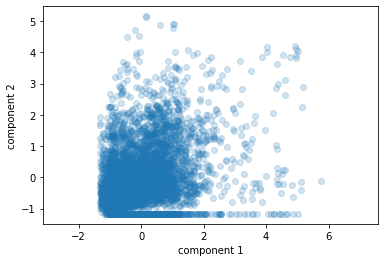

In [51]:
#X_new = pca.inverse_transform(X_pca)
plt.scatter(X_norm[:, 0], X_norm[:, 1], alpha=0.2)
#plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.1)
#plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.1)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.axis('equal');

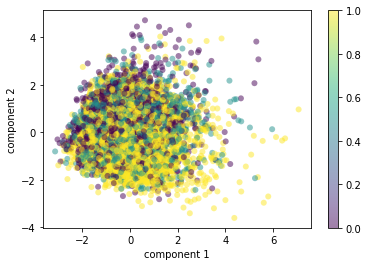

In [52]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], edgecolor='none', alpha=0.5, c=Y)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()

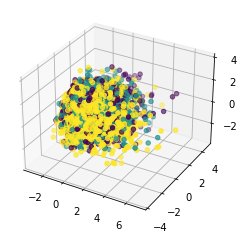

In [53]:
from mpl_toolkits import mplot3d

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=Y)

In [54]:
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)
X_pca.head()

loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=X.columns,  # and the rows are the original features
)
#loadings

array([<AxesSubplot:title={'center':'Variancia explicada'}, xlabel='Componente'>,
       <AxesSubplot:title={'center':'Variância acumulada'}, xlabel='Componente'>],
      dtype=object)

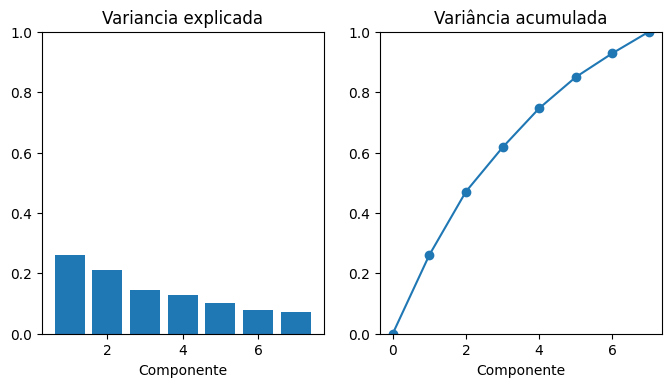

In [55]:
def plot_variance(pca, width=8, dpi=100):
    # Criar figura
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    
    # Fazer o cálculo da variância explicada
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Componente", 
        title="Variancia explicada", 
        ylim=(0.0, 1.0)
    )
    
    # Variância acumulada
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Componente", 
        title="Variância acumulada", 
        ylim=(0.0, 1.0)
    )
    
    # Detalhes da figura
    fig.set(figwidth=8, dpi=100)
    return axs

# Graficar
plot_variance(pca)


Começamos por reorganizar os dados e fizemos o PCA com algumas das features usadas anteriormente, dados esses que estavam normalizados. Após isso plotamos alguns gráficos para visualizar os dados normalizados e algumas componentes do PCA, e por meio desses graficos as componentes do PCA foram capazes de mostrar relativamente o resultado, mas não foram capazes de criar divisão clara. Por fim a variância explicada mostra que todas as componemtes tem certa relevância e a acumulada mostra que as 4 primeiras já seriam o suficiente para determinar cerca de 80% dos resultados.

### Refazendo Classificação por Floresta Aleatória

In [56]:
Condições = [
    (dfbr['gols_man'] > dfbr['gols_vis']),
    (dfbr['gols_man'] == dfbr['gols_vis']),
    (dfbr['gols_man'] < dfbr['gols_vis'])
    ]

# Cria uma lista com os possíveis resultados
Valores = ['Vitória', 'Empate', 'Derrota']

# Cria uma nova coluna com o resultado da partida para o mandante
dfbr['resultado_man'] = np.select(Condições, Valores)

#dfbr.head()

In [57]:
# Nova divisão dos dados do dataset em treino e teste

from sklearn.model_selection import train_test_split # Divisão feita usando a função train_test_split

TAMANHO_TESTE = 0.3 # Porcentagem destinada do dataset ao grupo de teste
SEMENTE_ALEATORIA = 122106 # Definição de uma seed para evitar mudança desses grupos

# Escolha dos índices e seleção feita pela função
indices = dfbr.index
indices_treino, indices_teste = train_test_split(
    indices, test_size=TAMANHO_TESTE, random_state=SEMENTE_ALEATORIA
)

# Atribuição dos índices escolhidos aos dados
dfbr_treino = dfbr.loc[indices_treino].sort_index()
dfbr_teste = dfbr.loc[indices_teste].sort_index()
X_pca_treino = X_pca.loc[indices_treino].sort_index()
X_pca_teste = X_pca.loc[indices_teste].sort_index()

# Aqui são escolhidos os atributos do dataset e é definido o target 

FEATURES = ['PC1','PC2','PC3','PC4','PC5']
TARGET = ["resultado_man"]

# Divide os dados para se adequarem aos modelos

X_treino = X_pca_treino.reindex(FEATURES, axis=1).values
y_treino = dfbr_treino.reindex(TARGET, axis=1).values
X_teste = X_pca_teste.reindex(FEATURES, axis=1).values
y_teste = dfbr_teste.reindex(TARGET, axis=1).values

In [58]:
# Floresta Aleatória

from sklearn.ensemble import RandomForestClassifier

# cria o modelo
modelo_rf = RandomForestClassifier(random_state=SEMENTE_ALEATORIA)

# treina o modelo
modelo_rf.fit(X_treino, y_treino.ravel())

# realiza uma previsão usando o modelo treinado
previsao = modelo_rf.predict(X_teste)
print(previsao[1])

# Precisão do método
print("Accuracy:",metrics.accuracy_score(y_teste, previsao))

Vitória
Accuracy: 0.47935003385240355


In [59]:
# Matriz com a quantidade de resultados previstos

resultados_mandante, quantidade = np.unique(previsao, return_counts=True)
Matriz_Resultados_Previstos_FA = np.column_stack((resultados_mandante, quantidade)) 
Matriz_Resultados_Previstos_FA

array([['Derrota', 206],
       ['Empate', 214],
       ['Vitória', 1057]], dtype=object)

In [60]:
# Matriz de Confusão

from sklearn.metrics import confusion_matrix
Matriz_Confusao_FA = confusion_matrix(y_teste, previsao)
Matriz_Confusao_FA

array([[ 73,  53, 193],
       [ 43,  67, 296],
       [ 90,  94, 568]], dtype=int64)

In [61]:
# Report com diferentes métricas

from sklearn.metrics import classification_report
classification_report(y_teste, previsao)

'              precision    recall  f1-score   support\n\n     Derrota       0.35      0.23      0.28       319\n      Empate       0.31      0.17      0.22       406\n     Vitória       0.54      0.76      0.63       752\n\n    accuracy                           0.48      1477\n   macro avg       0.40      0.38      0.37      1477\nweighted avg       0.44      0.48      0.44      1477\n'

Realizamos a classificação com o modelo da floresta, o qual apresentou melhor resultado no bloco anterior, utilizando PCA como treino e teste. já a acurácia foi de 48% e a precisão para vitória foi de 54%. Assim como anteriormente o modelo também apresentou uma grande quantidade de vitórias e também uma distribuição semelhante dos resultados. Sendo assim, refazer esse modelo com PCA não apresentou grandes mudanças. 

## K-Means

### Com os dados do dataset

In [62]:
from sklearn.cluster import KMeans

n_clusters=3  #Define três clusters

kmeans = KMeans(            #Inicializando o K-Means
    n_clusters=n_clusters,  #Definindo número de clusters
    init='random',          #Inicialização randomica, aqui você pode tentar o K-Means++ :)
    n_init=10,              #Número de inicializações
    max_iter=500,           #Número máximo de iterações
    tol=1e-04,              #Tolerância para variação da coordenada dos centróides para definir a convergência
    random_state=0          #Define a semente aleatória
)

y_kmeans = kmeans.fit_predict(X_norm) #Fita o K-Means

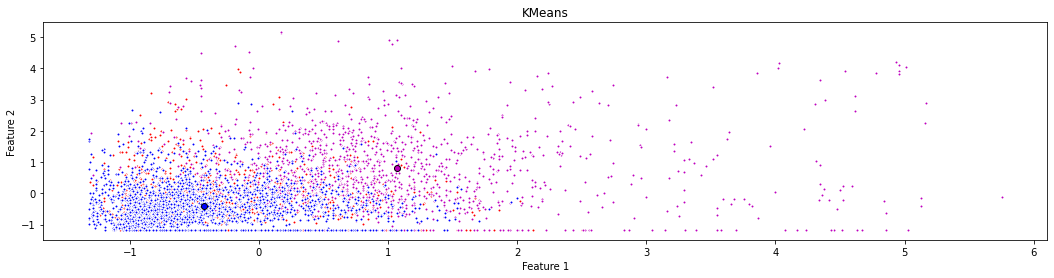

In [63]:
from sklearn.metrics.pairwise import pairwise_distances_argmin

centroids = kmeans.cluster_centers_ #Extraindo os centróides do K-Means
labels = pairwise_distances_argmin(X_norm, centroids) #Usando a função pairwise_distances_argmin 
                                                      #para dar os labels aos clusters
colors = ["r", "m", "b", "y", "k"] #Definindo a paleta de cores

fig = plt.figure(figsize=(18, 4)) #Definindo a figura e seu tamanho
ax = fig.add_subplot()             #Criando um subplot

for k, col in zip(range(n_clusters), colors): #Desempacotando a lista de número de cluster e cores.
    my_members = labels == k  #Define quais pontos são membros de cada cluster
    #print(my_members)        #Descomente essa linha para entender como se comporta a variável my_members
    cluster_center = centroids[k] #Pega as coordenadas do centróide k
    ax.plot(                      #Plota os pontos do centróide k
        X_norm[my_members, 0],    #Coordenada do eixo-x
        X_norm[my_members, 1],    #Coordenada do eixo-y
        markerfacecolor=col,      #Define a cor do ponto
        marker=".",               #Define o estilo do ponto
        markeredgecolor="w",      #Define a cor de contorno do ponto
        linewidth=0               #Largura de linha zero, para não ligar os pontos
    )
    ax.plot(                      #Plotando os centróides
        cluster_center[0],        #Coordenada x do centróide
        cluster_center[1],        #Coordenada y do centróide
        marker="o",               #Define estilo do ponto
        markerfacecolor=col,      #Define cor do ponto
        markeredgecolor="k",      #Define a cor do contorno do ponto
        markersize=6,             #Define o tamanho do ponto
        linewidth=0               #Largura de linha zero, para não ligar os pontos
    )

ax.set_title("KMeans")  #Título do gráfico
plt.xlabel('Feature 1') #Nome da componente x
plt.ylabel('Feature 2') #Nome da componente y

plt.show() #Mostrar o gráfico

Por meio do dataset normal tentamos clusterizar grupos utilizando duas features, onde foi possivel ver poucas diferenças entre os grupos, devido a correção não tão forte  entre as componetes, algo não padronizado. 

### Com os dados do PCA

In [64]:
pca = PCA()
pca.fit(X_norm)
X_pca = pca.transform(X_norm)

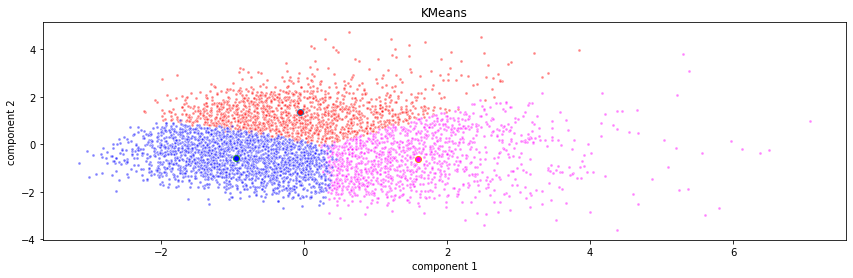

In [65]:
n_clusters=3

kmeans = KMeans(
    n_clusters=n_clusters, 
    init='random',
    n_init=10, 
    max_iter=300, 
    tol=1e-04, 
    random_state=0
)

y_kmeans = kmeans.fit_predict(X_pca)

centroids = kmeans.cluster_centers_
labels = pairwise_distances_argmin(X_pca, centroids)
colors = ["red", "magenta", "blue", "yellow", "black","green","pink","purple"]

fig = plt.figure(figsize=(14.4, 4))
ax = fig.add_subplot()

for k, col in zip(range(n_clusters), colors):
    my_members = labels == k
    cluster_center = centroids[k]
    ax.plot(
        X_pca[my_members, 0],
        X_pca[my_members, 1],
        "w", 
        markerfacecolor=col,
        marker=".",
        alpha = 0.5,
        linewidth=0)
    ax.plot(
        cluster_center[0],
        cluster_center[1],
        "o",
        markerfacecolor=col,
        markersize=6,
        alpha = 1.0,
        linewidth=0
    )

ax.set_title("KMeans")
plt.xlabel('component 1')
plt.ylabel('component 2')

plt.show()

Ocorreu uma otima divisão, todavia, os dados não são bem retratados comparando ao plot feito na seção anterior com PCA, portanto, o método clustering não foi efetivo nesse caso. Chegamos a essa conclusão, devido a grande dispersão dos resultados e a não tão grande relação entre resultado da partida e as duas componemtes principais.

### Cotovelo de clusters

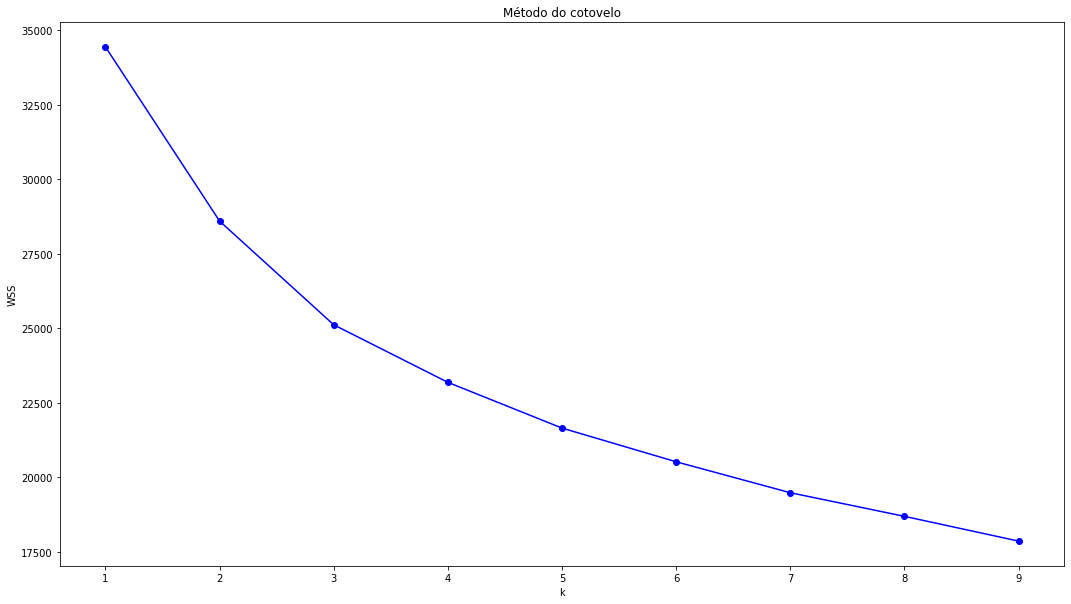

In [66]:
WSS = []  #Inicia uma lista vazia, para acumularmos valores.

for k in range(1,10): #Vamos fazer para 1 a 9 clusters.
    kmeans = KMeans(  #Inicializa o K-Means, como já explicado antes
        n_clusters=k, 
        init='random',
        n_init=10, 
        max_iter=300, 
        tol=1e-04, 
        random_state=0
    )
    y_kmeans = kmeans.fit_predict(X_pca) #Fita o K-Means
    WSS.append(kmeans.inertia_)          #Obtem a WSS e acumula na lista inicializada 
    
plt.figure(figsize=(18,10))              #Define o tamanho da figura
plt.plot(range(1,10), WSS, '-bo')        #Define o plot
plt.xlabel('k')                          #Nome da coordenada x
plt.ylabel('WSS')                        #Nome da coordenada y
plt.title('Método do cotovelo')          #Título do gráfico
plt.show()             

Observando o gráfico obtido, notamos que não houve nenhuma grande variação no formato de cotovelo, o que determinasse em uma quantidade ideal de clusterings para ser usados. Portanto usamos k = 3 por causa dos 3 tipos de resultados possiveis.

## Detecção de Valores Anômalos

### Local Outlier Factor (LOF)

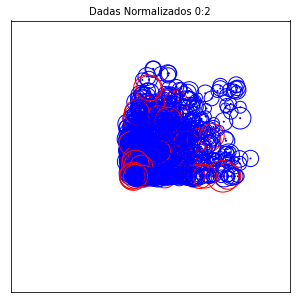

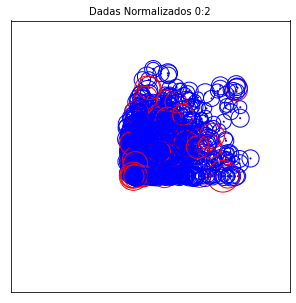

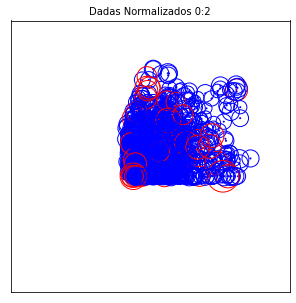

In [67]:
from sklearn.neighbors import LocalOutlierFactor

N_VIZINHOS = [10,20,30]
FRACAO_OUTLIERS = 0.01

# Gráficos com os dados do dataset normalizados

data_x = X_norm
CORES = np.array(["red", "blue"])

for n_viz in N_VIZINHOS:
    # Aqui que criamos o modelo de Local Outlier Factor
    modelo_lof = LocalOutlierFactor(
    n_neighbors=n_viz,
    contamination=FRACAO_OUTLIERS,
    )
    modelo_lof.fit(data_x)
    
    previsao = modelo_lof.fit_predict(data_x)
    fig, eixo = plt.subplots(figsize=(5, 5))
    eixo.scatter(
        data_x[:, 0],
        data_x[:, 1],
        marker=".",
        s=4,
        color=CORES[(previsao + 1) // 2],
    )
    # plota os círculos!
    X_lof = modelo_lof.negative_outlier_factor_
    raios = (X_lof.max() - X_lof) / (X_lof.max() - X_lof.min())
    eixo.scatter(
        data_x[:, 0],
        data_x[:, 1],
        s=1000 * raios,
        edgecolors=CORES[(previsao + 1) // 2],
        facecolors="none",
    )
    eixo.set_xlim(-8, 8)
    eixo.set_ylim(-8, 8)
    eixo.set_xticks(())
    eixo.set_yticks(())
    eixo.set_title(f"Dadas Normalizados 0:{i}", fontsize=10)
    plt.show()

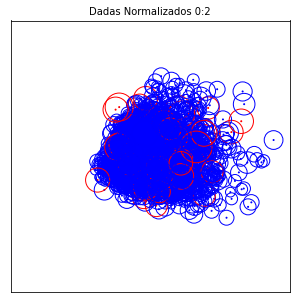

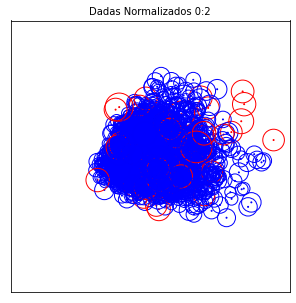

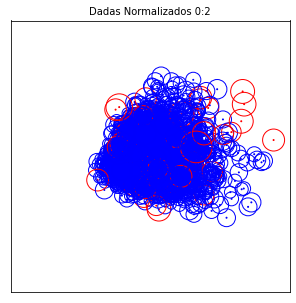

In [68]:
from sklearn.neighbors import LocalOutlierFactor

N_VIZINHOS = [10,20,30]
FRACAO_OUTLIERS = 0.01

# Gráficos com os dados do pca:

data_x = X_pca
CORES = np.array(["red", "blue"])

for n_viz in N_VIZINHOS:
    # Aqui que criamos o modelo de Local Outlier Factor
    modelo_lof = LocalOutlierFactor(
    n_neighbors=n_viz,
    contamination=FRACAO_OUTLIERS,
    )
    modelo_lof.fit(data_x)
    
    previsao = modelo_lof.fit_predict(data_x)
    fig, eixo = plt.subplots(figsize=(5, 5))
    eixo.scatter(
        data_x[:, 0],
        data_x[:, 1],
        marker=".",
        s=4,
        color=CORES[(previsao + 1) // 2],
    )
    # plota os círculos!
    X_lof = modelo_lof.negative_outlier_factor_
    raios = (X_lof.max() - X_lof) / (X_lof.max() - X_lof.min())
    eixo.scatter(
        data_x[:, 0],
        data_x[:, 1],
        s=1000 * raios,
        edgecolors=CORES[(previsao + 1) // 2],
        facecolors="none",
    )
    eixo.set_xlim(-8, 8)
    eixo.set_ylim(-8, 8)
    eixo.set_xticks(())
    eixo.set_yticks(())
    eixo.set_title(f"Dadas Normalizados 0:{i}", fontsize=10)
    plt.show()

Por meio do gráfico é possivel ter ideia de apenas alguns outlies possiveis na borda dessa comparação de features. Nessa perpectiva, com uma maior quantidade de vizinhos é visivel uma melhora na visualização dos outliers.

### Isolation Forest

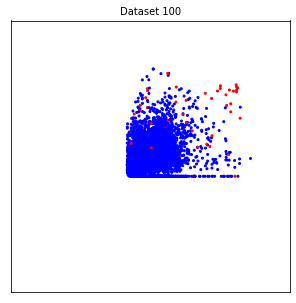

In [69]:
# Gráficos com os dados normalizados

from sklearn.ensemble import IsolationForest

CORES = np.array(["red", "blue"])
COM_BORDA_DE_PREVISAO = False # mude para True para ver a borda de previsão
FRACAO_OUTLIERS = 0.01
# Aqui que criamos o modelo de Isolation Forest
modelo_if = IsolationForest(
    contamination=FRACAO_OUTLIERS,
    random_state=SEMENTE_ALEATORIA,
)

# Ajustamos o modelo aos dados e realizamos a previsão
data_x = X_norm
modelo_if.fit(data_x)
previsao = modelo_if.predict(data_x)
fig, eixo = plt.subplots(figsize=(5, 5))
eixo.scatter(
    data_x[:, 0],
    data_x[:, 1],
    s=4,
    color=CORES[(previsao + 1) // 2],
)
eixo.set_xlim(-8, 8)
eixo.set_ylim(-8, 8)
eixo.set_xticks(())
eixo.set_yticks(())
eixo.set_title(f"Dataset {n}", fontsize=10)
# plota a borda entre as regiões de outlier/inlier
if COM_BORDA_DE_PREVISAO:
    xx, yy = np.meshgrid(
        np.linspace(-8, 8, 150),
        np.linspace(-8, 8, 150),
    )
    Z = modelo_if.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    eixo.contour(xx, yy, Z, levels=[0], linewidths=2, colors="black")
plt.show()

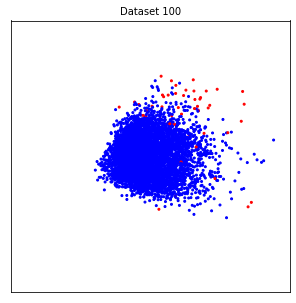

In [70]:
# Gráficos com os dados do pca

from sklearn.ensemble import IsolationForest

CORES = np.array(["red", "blue"])
COM_BORDA_DE_PREVISAO = False # Mude para True para ver a borda de previsão
FRACAO_OUTLIERS = 0.01
# Aqui que criamos o modelo de Isolation Forest
modelo_if = IsolationForest(
    contamination=FRACAO_OUTLIERS,
    random_state=SEMENTE_ALEATORIA,
)

# Ajustamos o modelo aos dados e realizamos a previsão
data_x = X_pca
modelo_if.fit(data_x)
previsao = modelo_if.predict(data_x)
fig, eixo = plt.subplots(figsize=(5, 5))
eixo.scatter(
    data_x[:, 0],
    data_x[:, 1],
    s=4,
    color=CORES[(previsao + 1) // 2],
)
eixo.set_xlim(-8, 8)
eixo.set_ylim(-8, 8)
eixo.set_xticks(())
eixo.set_yticks(())
eixo.set_title(f"Dataset {n}", fontsize=10)
# Plota a borda entre as regiões de outlier/inlier
if COM_BORDA_DE_PREVISAO:
    xx, yy = np.meshgrid(
        np.linspace(-8, 8, 150),
        np.linspace(-8, 8, 150),
    )
    Z = modelo_if.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    eixo.contour(xx, yy, Z, levels=[0], linewidths=2, colors="black")
plt.show()

A visualização gráfica dos dados é difícil devido a quantidade de features que gera uma grande quantidade de dimensões. EX: uma nuvem bem localizada com outlier diretamente acima no eixo z, quando é analisado levando em conta o plano x e y, aparenta que o ponto vermelho está acima do azul, mas avaliando por outros eixos, esse outlier está entre os pontos e não acima como anteriormente apresentado. Além disso a Isolation Forest apresentou-se um pouco mais eficaz para diferenciar os outliers, mesmo com essa difícil visualização. 


# Bloco 4

## Validação Cruzada / Regressões

### Organizando dados

Nesse bloco, estamos utilizando duas organizações, essa abaixo para as regressões e uma depois para as classificações. Sendo assim, recuperamos os dados originais e usamos a versão apropriada para cada problema.

Vale notar que estamos usando diferentes features, a fim de melhorar a eficiência e o significado dos resultados quando comparados aos dos blocos anteriores.

In [ ]:
# Código para ler o arquivo em xls e retorná-lo em dataframe
dfbr = pd.read_excel("dados brasileirao.xlsx") 

# Nesta linha, foram retiradas todas as colunas que possuiam dados relativos à estáticas após o começo do jogo. Os Dados após o jogo começar não nos ajudam a prever os nossos resultados, pois são muito específicos de cada jogo. Então vamos analisar o principal: número de gols
dfbr = dfbr.drop(["escanteios_man", "escanteios_vis", "publico_max", "faltas_man", "faltas_vis", "chutes_bola_parada_man", "chutes_bola_parada_vis", "defesas_man", "defesas_vis", "impedimentos_man", "impedimentos_vis", "chutes_man", "chutes_vis", "chutes_fora_man", "chutes_fora_vis", "gols_1_tempo_man", "gols_1_tempo_vis"], axis=1)

# Nesta linha, foram tiradas todas as linhas que possuiam dados faltantes, visto que os anos iniciais não tinham todos os dados da tabela preenchidos.
dfbr = dfbr.dropna(axis = 0)

# Nesta linha, são redefinidos os índices para facilitar o trabalho com os dados e foi feito após retirar os dados que não íamos precisar.
dfbr = dfbr.reset_index()

# Nesta parte, foram retiradas as colunas "index" e "Unnamed: 0" para facilitar o trabalho com os dados (Eram colunas com repetição de índices antigos)
dfbr = dfbr.drop(columns=["index", "Unnamed: 0"])

In [ ]:
from sklearn.model_selection import train_test_split

TAMANHO_TESTE = 0.1 # Porcentagem destinada do dataset ao grupo de teste
SEMENTE_ALEATORIA = 122106 # Definição de uma seed para evitar mudança desses grupos

FEATURES = ["valor_equipe_titular_man","publico","idade_media_titular_man",
            "colocacao_man","valor_equipe_titular_vis","idade_media_titular_vis",
            "colocacao_vis"]#,"gols_man","gols_vis"]

TARGET = ["gols_man"]

indices = dfbr.index
indices_treino, indices_teste = train_test_split(
    indices, test_size=TAMANHO_TESTE, random_state=SEMENTE_ALEATORIA
)

dfbr_treino = dfbr.loc[indices_treino]
dfbr_teste = dfbr.loc[indices_teste]

X_treino = dfbr_treino.reindex(FEATURES, axis=1).values
y_treino = dfbr_treino.reindex(TARGET, axis=1).values.ravel()
X_teste = dfbr_teste.reindex(FEATURES, axis=1).values
y_teste = dfbr_teste.reindex(TARGET, axis=1).values.ravel()

### Regressão com Floresta Aleatória

Foram usados 5 hiperparâmetros aqui: número de árvores, de folhas, profundidade, jobs e a semente aleatória específica.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

NUM_ARVORES = 10
NUM_FOLDS = 10
NUM_CPU_CORES = 4

modelo_rf = RandomForestRegressor(
    n_estimators=NUM_ARVORES,
    random_state=SEMENTE_ALEATORIA,
    max_leaf_nodes=3,
    max_depth=3,
    n_jobs=NUM_CPU_CORES,
)
scores = cross_val_score(
    modelo_rf,
    X_treino,
    y_treino,
    cv=NUM_FOLDS,
    scoring="neg_root_mean_squared_error", #RMSE
)

print("Os scores foram de: ", scores)
print()
print("A média dos scores é de: ", scores.mean())

## Validação Cruzada / Classificações

### Organizando dados

Como dito antes, segue aqui a organização usada para as classificações

In [ ]:
# Código para ler o arquivo em xls e retorná-lo em dataframe
dfbr = pd.read_excel("dados brasileirao.xlsx") 

# Nesta linha, foram retiradas todas as colunas que possuiam dados relativos à estáticas após o começo do jogo. Os Dados após o jogo começar não nos ajudam a prever os nossos resultados, pois são muito específicos de cada jogo. Então vamos analisar o principal: número de gols
dfbr = dfbr.drop(["escanteios_man", "escanteios_vis", "publico_max", "faltas_man", "faltas_vis", "chutes_bola_parada_man", "chutes_bola_parada_vis", "defesas_man", "defesas_vis", "impedimentos_man", "impedimentos_vis", "chutes_man", "chutes_vis", "chutes_fora_man", "chutes_fora_vis", "gols_1_tempo_man", "gols_1_tempo_vis"], axis=1)

# Nesta linha, foram tiradas todas as linhas que possuiam dados faltantes, visto que os anos iniciais não tinham todos os dados da tabela preenchidos.
dfbr = dfbr.dropna(axis = 0)

# Nesta linha, são redefinidos os índices para facilitar o trabalho com os dados e foi feito após retirar os dados que não íamos precisar.
dfbr = dfbr.reset_index()

# Nesta parte, foram retiradas as colunas "index" e "Unnamed: 0" para facilitar o trabalho com os dados (Eram colunas com repetição de índices antigos)
dfbr = dfbr.drop(columns=["index", "Unnamed: 0"])

In [ ]:
# Cria uma lista de condições
Condições = [
    (dfbr['gols_man'] > dfbr['gols_vis']),
    (dfbr['gols_man'] == dfbr['gols_vis']),
    (dfbr['gols_man'] < dfbr['gols_vis'])
    ]

# Cria uma lista com os possíveis resultados
Valores = ['Vitória', 'Empate', 'Derrota']

# Cria uma nova coluna com o resultado da partida para o mandante
dfbr['resultado_man'] = np.select(Condições, Valores)

dfbr.head()

In [ ]:
from sklearn.model_selection import train_test_split

TAMANHO_TESTE = 0.1 # Porcentagem destinada do dataset ao grupo de teste
SEMENTE_ALEATORIA = 122106 # Definição de uma seed para evitar mudança desses grupos

FEATURES = ["valor_equipe_titular_man","publico","idade_media_titular_man",
            "colocacao_man","valor_equipe_titular_vis","idade_media_titular_vis",
            "colocacao_vis"]#,"gols_man","gols_vis"]

TARGET = ["resultado_man"]

indices = dfbr.index
indices_treino, indices_teste = train_test_split(
    indices, test_size=TAMANHO_TESTE, random_state=SEMENTE_ALEATORIA
)

dfbr_treino = dfbr.loc[indices_treino]
dfbr_teste = dfbr.loc[indices_teste]

X_treino = dfbr_treino.reindex(FEATURES, axis=1).values
y_treino = dfbr_treino.reindex(TARGET, axis=1).values.ravel()
X_teste = dfbr_teste.reindex(FEATURES, axis=1).values
y_teste = dfbr_teste.reindex(TARGET, axis=1).values.ravel()

### Classificação com Floresta Aleatória

O único hiperparâmetro usado aqui foi a semente aleatória específica

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

NUM_ARVORES = 10
NUM_FOLDS = 10
NUM_CPU_CORES = 4

modelo_rf = RandomForestClassifier(random_state=SEMENTE_ALEATORIA)
scores = cross_val_score(
    modelo_rf,
    X_treino,
    y_treino,
    cv=NUM_FOLDS,
)

print("Os scores foram de: ", scores)
print()
print("A média dos scores é de: ", scores.mean())